# Fed Challenge Data Visualization Code

This notebook will develop code for different data visualizations using the FRED API (in python). Before we start, lets set the goals of this project. Most of the visualizations are set to be line graphs, bar graphs and pie charts. Thus, we will develop fundamental code for each of these types, and we will manipulate them in terms of the specific data we are trying to add.


In [1]:
#you might need to install some stuff
#!pip install fredapi
#!pip install seaborn

In [62]:
#then you load the installed packages into the notebook
import fredapi as fa 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mtick
#import matplotlib as plt



In [63]:
#this is referencing another document on my jupiter enviroment, which is a pretty simple code that references the key access
#from the fred website. The name of the document is local_settings as you can see

from local_settings import fred as settings

#here is the code:
#fred = {
#    'api_key':'e3f48ec51661cc03ebf77156093126f5'
#}

#that number is the specific key. Keys have to be different to each project

#to get a unique key, use this website together with an account to fred (its all free):

#https://fredaccount.stlouisfed.org/apikey

#it will give you a key right away

In [4]:
#now we set the key to our enviroment 

fred = fa.Fred(settings['api_key'])

In [4]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

Now, we can start accessing data from the fed. Here is an example accessing GDP and Real GDP. Please note that the way to reference them is by using the unique ID each data series have on the website.

In [6]:
#gdp vs real gdp example

gdp = fred.get_series('gdp')
gdp.name = 'gdp'

real_gdp = fred.get_series('GDPC1')
real_gdp.name = 'real_gdp'

Now we perform some data-cleaning, pretty straight-forward for all datatypes obtained from FRED

In [116]:
gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = 'Nominal GDP'


In [117]:
real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Real GDP'

Let's first start with a simple visualization example

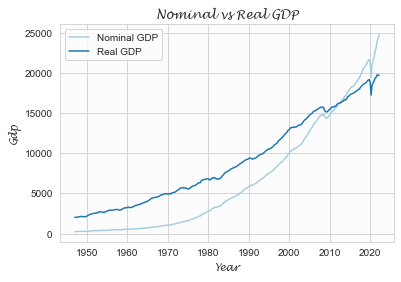

In [140]:
sns.set_palette("Paired")

sns.lineplot(data=gdp_plot, x="year", y="gdp", palette = 'hls')
sns.lineplot(data=real_gdp_plot, x="year", y="real_gdp")
plt.title('Nominal vs Real GDP', fontname = 'Lucida Handwriting')
plt.xlabel("Year", fontname="Lucida Handwriting", fontsize=10)
plt.ylabel("Gdp", fontname="Lucida Handwriting", fontsize=10)
plt.legend(labels=["Nominal GDP","Real GDP"])

#sns.set_style("ticks")


Now, lets create an standarize method for the challenge

In [64]:
#in this case, we need to merge datasets to compare them both

all_dfs = [gdp_plot, real_gdp_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Billions of Dollars', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)


In [66]:
#note how the merg dataset is distributed
merg

,Billions of Dollars,Year,type1
0,243.164,1947-01-01,Nominal GDP
205,8969.699,1998-04-01,Nominal GDP
204,8866.480,1998-01-01,Nominal GDP
203,8765.907,1997-10-01,Nominal GDP
202,8662.823,1997-07-01,Nominal GDP
...,...,...,...
399,5100.447,1971-04-01,Real GDP
398,5072.996,1971-01-01,Real GDP
397,4938.857,1970-10-01,Real GDP
395,4946.770,1970-04-01,Real GDP


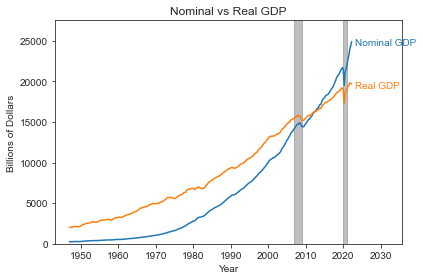

In [57]:
fig, ax = plt.subplots()

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Billions of Dollars", hue = "type1", palette = 'tab10', legend=None).set(title='Nominal vs Real GDP')

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, set(merg["type1"])):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
plt.ylim([0, 27500])
ax.axvspan('2007-01-01', '2009-01-01', alpha=0.5, color='grey')
ax.axvspan('2020-01-01', '2021-01-01', alpha=0.5, color='grey')
sns.set_style("ticks")
plt.show()

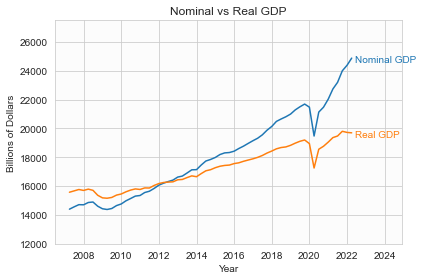

In [105]:
#now lets subset the data 

fig, ax = plt.subplots()

#set the lines together with the title
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2007-01-01'], x="Year", y="Billions of Dollars", hue = "type1",palette = 'tab10', legend=None).set(title='Nominal vs Real GDP')

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, set(merg["type1"])):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"axes.facecolor": ".99"})
plt.show()

Now, lets apply a different example: lets work with employment data

In [61]:
#lets do the Unemployment Level/Job Openings: Total Nonfarm

unemployment = fred.get_series('LNU03000000')
unemployment.name = 'unemployment'

openings = fred.get_series('JTUJOL')
openings.name = 'openings'

unemployment_plot = unemployment.to_frame()
unemployment_plot['year'] = unemployment.index
unemployment_plot.reset_index(drop=True, inplace=True)
unemployment_plot.dropna(inplace=True)
unemployment_plot['type'] = 'Unemployment level'

openings_plot = openings.to_frame()
openings_plot['year'] = openings.index
openings_plot.reset_index(drop=True, inplace=True)
openings_plot.dropna(inplace=True)
openings_plot['type'] = 'Job openings'


all_dfs = [unemployment_plot, openings_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Thousands', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)
merg

,Thousands,Year,type1
1155,12086.0,2022-07-01,Job openings
989,3242.0,2008-09-01,Job openings
988,3808.0,2008-08-01,Job openings
987,4013.0,2008-07-01,Job openings
986,3757.0,2008-06-01,Job openings
...,...,...,...
382,5964.0,1979-11-01,Unemployment level
381,5964.0,1979-10-01,Unemployment level
380,5978.0,1979-09-01,Unemployment level
288,5481.0,1972-01-01,Unemployment level


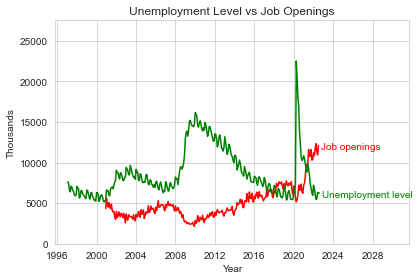

In [62]:
fig, ax = plt.subplots()

#set the lines together with the title
sns.lineplot(ax=ax, data=merg[merg["Year"] > '1997-01-01'], x="Year", y="Thousands", hue = "type1", palette=['r', 'g'], legend=None).set(title='Unemployment Level vs Job Openings')

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, set(merg["type1"])):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
plt.ylim([0, 27500])
sns.set_style("whitegrid")
plt.show()

In [14]:
#now, to cut it short, we can create a ratio by dividing themset(merg["type1"])
#first, match by year

data = unemployment_plot.merge(openings_plot, how='left', on='Year')
data.dropna(inplace=True)

data["div"] = data["Thousands_x"]/ data["Thousands_y"]
data

,Thousands_x,Year,type1_x,Thousands_y,type1_y,div
635,5264.0,2000-12-01,Unemployment level,4335.0,Job openings,1.214302
636,6647.0,2001-01-01,Unemployment level,5592.0,Job openings,1.188662
637,6523.0,2001-02-01,Unemployment level,4844.0,Job openings,1.346614
638,6509.0,2001-03-01,Unemployment level,4514.0,Job openings,1.441958
639,6004.0,2001-04-01,Unemployment level,5095.0,Job openings,1.178410
...,...,...,...,...,...,...
890,6168.0,2022-03-01,Unemployment level,11737.0,Job openings,0.525518
891,5458.0,2022-04-01,Unemployment level,12324.0,Job openings,0.442876
892,5548.0,2022-05-01,Unemployment level,11319.0,Job openings,0.490149
893,6334.0,2022-06-01,Unemployment level,10941.0,Job openings,0.578923


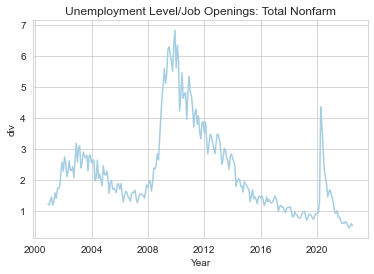

In [15]:
sns.set_palette("Paired")

sns.lineplot(data=data, x="Year", y="div").set(title='Unemployment Level/Job Openings: Total Nonfarm')

sns.set_style("whitegrid")


In [371]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch
#frequency = "q" or "m"
#these are things you can put inside the get_series function

data_1 = fred.get_series('UNRATE')
data_1.name = 'U3RATE'

data_2 = fred.get_series('JTSJOR')
data_2.name = 'JTSJOR'

data_1_plot = data_1.to_frame()
data_1_plot['year'] = data_1_plot.index
data_1_plot.reset_index(drop=True, inplace=True)
data_1_plot.dropna(inplace=True)
data_1_plot['type'] = 'U3 RATE'

data_2_plot = data_2.to_frame()
data_2_plot['year'] = data_2_plot.index
data_2_plot.reset_index(drop=True, inplace=True)
data_2_plot.dropna(inplace=True)
data_2_plot['type'] = 'Vacancy rate'



data_11 = fred.get_series('JTSJOR')
data_11.name = 'JTSJOR'

data_11_plot = data_11.to_frame()
data_11_plot['year'] = data_11_plot.index
data_11_plot.reset_index(drop=True, inplace=True)
data_11_plot.dropna(inplace=True)
data_11_plot['type'] = 'Vacancies'

#in this case, we need to merge datasets to compare them both

all_dfs = [data_1_plot, data_2_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

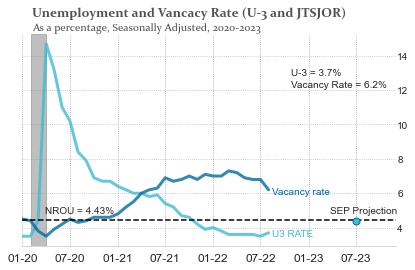

In [381]:
#two compare two values

fig, ax = plt.subplots()

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.12, y=.935, s="Unemployment and Vancacy Rate (U-3 and JTSJOR)", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="As a percentage, Seasonally Adjusted, 2020-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)


#set the lines with the dataset 
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2018-01-01'], x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph
plt.figtext(.72, .73, "U-3 = " + str(data_1_plot["Percentage"].iloc[-1]) + "%")
plt.figtext(.72, .69, "Vacancy Rate = " + str(data_2_plot["Percentage"].iloc[-1])+ "%")

plt.figtext(.81, .25, "SEP Projection" )

plt.figtext(.15, .25, "NROU = " + str(4.43)+ "%")
#plot grey area for recession information
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

#plt.ylim([12000, 27500])

plt.axhline(y = 4.43, color = "black",linestyle ='--')

plt.plot(date.fromisoformat("2023-07-01"),4.4, marker="o",markeredgecolor='#006BA2',  markersize=7, markerfacecolor="#3EBCD2")


#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([date.fromisoformat("2020-01-01"), date.fromisoformat("2023-12-01")])

#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=300, bbox_inches='tight')
plt.show()

In [407]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch
gdp = fred.get_series('GDPPOT',units = "pc1", frequency = "q", observation_end = "2022-12-10")
gdp.name = 'GDPPOT'

real_gdp = fred.get_series('GDPC1', units = "pc1", frequency = "q")
real_gdp.name = 'GDPC1'

gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = 'GDPPOT'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'GDPC1'

#in this case, we need to merge datasets to compare them both

all_dfs = [gdp_plot, real_gdp_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], ascending = True,  inplace = True)
import matplotlib
import matplotlib.pyplot as plt

In [408]:
merg

,Percentage,Year,type1
294,5.39412,1948-07-01,GDPC1
389,5.25519,1972-04-01,GDPC1
390,5.38194,1972-07-01,GDPC1
391,6.89448,1972-10-01,GDPC1
392,7.56189,1973-01-01,GDPC1
...,...,...,...
198,4.19731,1999-07-01,GDPPOT
199,4.21927,1999-10-01,GDPPOT
200,4.22998,2000-01-01,GDPPOT
184,2.78952,1996-01-01,GDPPOT


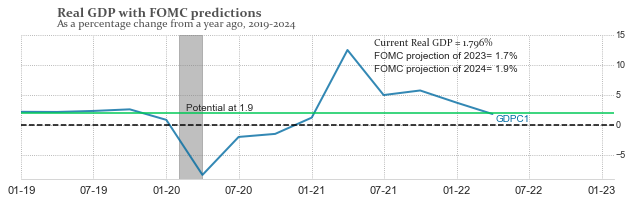

In [415]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(9,3))



ax.text(x=0.12, y=.935, s="Real GDP with FOMC predictions", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="As a percentage change from a year ago, 2019-2024", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=real_gdp_plot, x="Year", y="Percentage", hue = "type1", palette = [ '#006BA2'], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -8),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.figtext(.61, .80, "Current Real GDP = " + str(str("{:.3f}".format(real_gdp_plot["Percentage"].iloc[-1])))+ "%", **hfont)
plt.figtext(.61, .74, "FOMC projection of 2023= " + str(1.7)+ "%")
plt.figtext(.61, .68, "FOMC projection of 2024= " + str(1.9)+ "%")


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2019-01-01"), date.fromisoformat("2023-02-01")])

plt.ylim([float(-9), float(15)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")


plt.figtext(.32, .50, "Potential at 1.9")
plt.axhline(y = 1.9, color = "#00C957",linestyle ='-')


plt.axhline(y = 0, color = "black",linestyle ='--')

ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.savefig('filename.png', dpi=300, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

In [259]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch
gdp = fred.get_series('GDPPOT', frequency = "q", observation_end = "2023-07-10")
gdp.name = 'GDPPOT'

real_gdp = fred.get_series('GDPC1', frequency = "q")
real_gdp.name = 'GDPC1'

gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = 'GDPPOT'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'GDPC1'

real_gdp1 = fred.get_series('W875RX1', frequency = "q")
real_gdp1.name = 'W875RX1'

real_gdp_plot1 = real_gdp1.to_frame()
real_gdp_plot1['year'] = real_gdp1.index
real_gdp_plot1.reset_index(drop=True, inplace=True)
real_gdp_plot1.dropna(inplace=True)
real_gdp_plot1['type'] = 'W875RX1'

#in this case, we need to merge datasets to compare them both

all_dfs = [gdp_plot, real_gdp_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], ascending = True,  inplace = True)
import matplotlib
import matplotlib.pyplot as plt

In [248]:
merg

,Percentage,Year,type1
300,2029.024000,1947-04-01,GDPC1
396,5100.447000,1971-04-01,GDPC1
397,5142.422000,1971-07-01,GDPC1
398,5154.547000,1971-10-01,GDPC1
399,5249.337000,1972-01-01,GDPC1
...,...,...,...
201,12365.284990,1999-04-01,GDPPOT
202,12493.703484,1999-07-01,GDPPOT
203,12624.339768,1999-10-01,GDPPOT
205,12885.549543,2000-04-01,GDPPOT


In [249]:
merg['natural_log'] = np.log(merg['Percentage'])

In [250]:
merg

,Percentage,Year,type1,natural_log
300,2029.024000,1947-04-01,GDPC1,7.615310
396,5100.447000,1971-04-01,GDPC1,8.537083
397,5142.422000,1971-07-01,GDPC1,8.545279
398,5154.547000,1971-10-01,GDPC1,8.547635
399,5249.337000,1972-01-01,GDPC1,8.565857
...,...,...,...,...
201,12365.284990,1999-04-01,GDPPOT,9.422648
202,12493.703484,1999-07-01,GDPPOT,9.432980
203,12624.339768,1999-10-01,GDPPOT,9.443382
205,12885.549543,2000-04-01,GDPPOT,9.463862


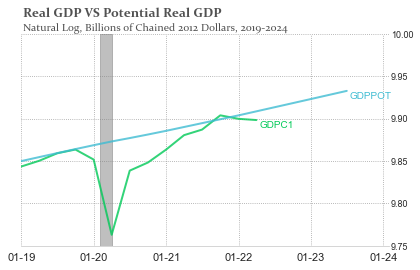

In [257]:
#now lets subset the data 

fig, ax = plt.subplots()



ax.text(x=0.12, y=.935, s="Real GDP VS Potential Real GDP", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Natural Log, Billions of Chained 2012 Dollars, 2019-2024", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="natural_log", hue = "type1", palette = ["#00C957", '#3EBCD2'], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -8),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})




ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2019-01-01"), date.fromisoformat("2024-02-01")])

plt.ylim([float(9.75), float(10)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")




ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.savefig('filename.png', dpi=300, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

In [159]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch
gdp = fred.get_series('JTSJOL', frequency = "m")
gdp.name = 'Total Job openings'

real_gdp = fred.get_series('JTS3000JOL', frequency = "m")
real_gdp.name = 'Manufactoring'

gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = 'Total Job openings'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Manufactoring'

#----------------------

gdp1 = fred.get_series('JTS2300JOL',frequency = "m")
gdp1.name = 'Construction'

real_gdp1 = fred.get_series('JTS4400JOL', frequency = "m")
real_gdp1.name = 'Retail'

gdp_plot1 = gdp1.to_frame()
gdp_plot1['year'] = gdp_plot1.index
gdp_plot1.reset_index(drop=True, inplace=True)
gdp_plot1.dropna(inplace=True)
gdp_plot1['type'] = 'Construction'

real_gdp_plot1 = real_gdp1.to_frame()
real_gdp_plot1['year'] = real_gdp1.index
real_gdp_plot1.reset_index(drop=True, inplace=True)
real_gdp_plot1.dropna(inplace=True)
real_gdp_plot1['type'] = 'Retail'

gdp2 = fred.get_series('JTU480099JOL',frequency = "m")
gdp2.name = 'Transportation'

gdp_plot2 = gdp2.to_frame()
gdp_plot2['year'] = gdp_plot2.index
gdp_plot2.reset_index(drop=True, inplace=True)
gdp_plot2.dropna(inplace=True)
gdp_plot2['type'] = 'Transportation'


#in this case, we need to merge datasets to compare them both

all_dfs = [real_gdp_plot,gdp_plot1, real_gdp_plot1,gdp_plot2]


# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']
    

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], ascending = True,  inplace = True)


In [160]:
sorted(set(merg["type1"]))


['Construction', 'Manufactoring', 'Retail', 'Transportation']

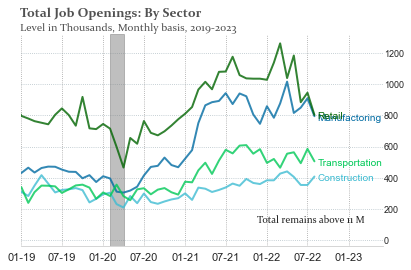

In [161]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(6,4))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.12, y=.935, s="Total Job Openings: By Sector", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Level in Thousands, Monthly basis, 2019-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2',"#006400","#00C957"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.figtext(.67, .22, "Total remains above 11 M", **hfont)


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2019-01-01"), date.fromisoformat("2023-06-01")])

#plt.ylim([float(-20), float(30)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")

ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.savefig('filename.png', dpi=400, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

In [28]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch

real_gdp = fred.get_series('PCETRIM12M159SFRBDAL', frequency = "m", units= "ch1")
real_gdp.name = 'Dallas Trimmed Mean'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Dallas Trimmed Mean'

#----------------------

gdp1 = fred.get_series('UNRATE',frequency = "m",units= "ch1")
gdp1.name = 'U-3'

real_gdp1 = fred.get_series('PCEPI', frequency = "m",units= "ch1")
real_gdp1.name = 'Price-index PCE'

gdp_plot1 = gdp1.to_frame()
gdp_plot1['year'] = gdp_plot1.index
gdp_plot1.reset_index(drop=True, inplace=True)
gdp_plot1.dropna(inplace=True)
gdp_plot1['type'] = 'U-3'

real_gdp_plot1 = real_gdp1.to_frame()
real_gdp_plot1['year'] = real_gdp1.index
real_gdp_plot1.reset_index(drop=True, inplace=True)
real_gdp_plot1.dropna(inplace=True)
real_gdp_plot1['type'] = 'Price-index PCE'

gdp2 = fred.get_series('JTSJOR',frequency = "m",units= "ch1")
gdp2.name = 'Job Openings Rate'

gdp_plot2 = gdp2.to_frame()
gdp_plot2['year'] = gdp_plot2.index
gdp_plot2.reset_index(drop=True, inplace=True)
gdp_plot2.dropna(inplace=True)
gdp_plot2['type'] = 'Job Openings Rate'

all_dfs1 = [gdp_plot1, real_gdp_plot1]
    
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs1:
    df.columns = ['Percentage', 'Year', 'type1']
merg1 = pd.concat(all_dfs1).reset_index(drop=True)



#in this case, we need to merge datasets to compare them both

all_dfs = [real_gdp_plot,gdp_plot1, real_gdp_plot1,gdp_plot2]


# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']
    

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], ascending = True,  inplace = True)


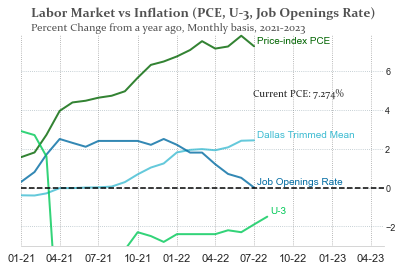

In [31]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(7,4))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.12, y=.935, s="Labor Market vs Inflation (PCE, U-3, Job Openings Rate)", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Percent Change from a year ago, Monthly basis, 2021-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2',"#006400","#00C957"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, 3),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2021-01-01"), date.fromisoformat("2023-05-01")])

plt.ylim([float(-3), float(7.9)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")

ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.axhline(y = 0, color = "black",linestyle ='--')

plt.figtext(.56, .66, "Current PCE: " + str(real_gdp_plot1["Percentage"].iloc[-1])+ "%", **hfont)


#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 

plt.savefig('filename.png', dpi=400, bbox_inches='tight')


plt.show()

In [393]:
#now we will do wage growth from two different sources

data_wage = pd.read_csv ('ping.csv')
print(data_wage)

         Date  Unweighted Overall  Weighted Overall  Weighted 97 Overall  \
0    3/1/1997                 4.5               4.9                  4.9   
1    4/1/1997                 4.6               5.0                  5.0   
2    5/1/1997                 4.5               4.9                  5.0   
3    6/1/1997                 4.6               5.0                  5.0   
4    7/1/1997                 4.8               5.1                  5.1   
..        ...                 ...               ...                  ...   
301  4/1/2022                 6.0               6.6                  7.5   
302  5/1/2022                 6.1               6.6                  7.6   
303  6/1/2022                 6.7               7.1                  7.9   
304  7/1/2022                 6.7               7.0                  7.7   
305  8/1/2022                 6.7               6.9                  7.1   

     Unweighted Overall: Weekly Basis  25/20 trimmed mean  
0                          

In [394]:
first_column = data_wage.iloc[:, [1,0]]
first_column = first_column.assign(type='Wage Growth')

In [395]:
for col in first_column.columns:
    print(col)

Unweighted Overall
Date
type


In [396]:
first_column['Date'] = pd.to_datetime(first_column['Date'])

In [397]:
gdp = fred.get_series('UNRATE')
gdp.name = 'U3RATE'

real_gdp = fred.get_series('LCEAMN01USM659S')
real_gdp.name = 'Manufactoring'

gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = 'U3 RATE'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Manufactoring'

#in this case, we need to merge datasets to compare them both

all_dfs = [first_column]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

In [398]:
merg

,Percentage,Year,type1
0,4.5,1997-03-01,Wage Growth
207,2.3,2014-06-01,Wage Growth
206,2.3,2014-05-01,Wage Growth
205,2.3,2014-04-01,Wage Growth
204,2.4,2014-03-01,Wage Growth
...,...,...,...
99,3.8,2005-06-01,Wage Growth
98,3.6,2005-05-01,Wage Growth
97,3.5,2005-04-01,Wage Growth
104,4.2,2005-11-01,Wage Growth


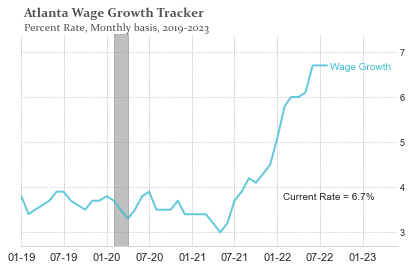

In [406]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(6,4))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.09, y=.935, s="Atlanta Wage Growth Tracker", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.09, y=.885, s="Percent Rate, Monthly basis, 2019-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2'], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

#plt.figtext(.67, .22, "Total remains above 11 M", **hfont)


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2019-01-01"), date.fromisoformat("2023-06-01")])

plt.figtext(.69, .30, "Current Rate = " + str(merg["Percentage"].iloc[-1]) + "%")

plt.ylim([float(2.7), float(7.4)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")

ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.savefig('filename.png', dpi=300, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

In [173]:
#HEEEERREEEEEEE

data_wage = pd.read_csv ('pcehist.csv')
print(data_wage)

         Year  1-month  6-month  12-month
0    1/1/2001     3.48     2.66      2.52
1    2/2/2001     2.55     2.76      2.54
2    3/1/2001     2.38     2.64      2.50
3    4/4/2001     2.91     2.72      2.59
4    5/5/2001     2.36     2.68      2.59
..        ...      ...      ...       ...
255  4/8/2022     3.09     4.30      3.91
256  5/8/2022     5.66     4.54      4.10
257  6/8/2022     7.17     4.99      4.48
258  7/8/2022     3.73     4.49      4.51
259  8/8/2022     5.97     4.79      4.74

[260 rows x 4 columns]


In [174]:
first_column = data_wage.iloc[:, [1,0]]
first_column = first_column.assign(type='DTM (1-Month)')

In [175]:
first_column['Year'] = pd.to_datetime(first_column['Year'])

In [176]:
second_column = data_wage.iloc[:, [3,0]]
second_column = second_column.assign(type='DTM (6-Month)')
second_column['Year'] = pd.to_datetime(second_column['Year'])

In [177]:
gdp = fred.get_series('UNRATE')
gdp.name = 'U3RATE'

real_gdp = fred.get_series('MEDCPIM158SFRBCLE')
real_gdp.name = 'Median CPI'

gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = 'U3 RATE'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Median CPI'

#in this case, we need to merge datasets to compare them both

all_dfs = [first_column, second_column, real_gdp_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

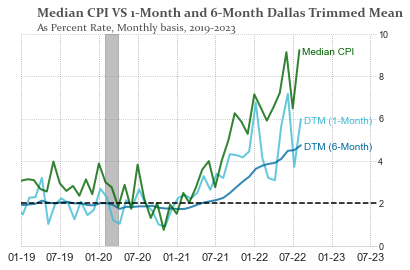

In [179]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(6,4))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.12, y=.935, s="Median CPI VS 1-Month and 6-Month Dallas Trimmed Mean", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="As Percent Rate, Monthly basis, 2019-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2', "#006400"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

#plt.figtext(.67, .22, "Total remains above 11 M", **hfont)


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2019-01-01"), date.fromisoformat("2023-08-01")])

plt.ylim([float(0), float(10)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")
plt.axhline(y = 2, color = "black",linestyle ='--')


ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.savefig('filename.png', dpi=400, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

In [416]:
#HEEEERREEEEEEE

data_wage = pd.read_csv ('Expectations.csv')
print(data_wage)

      Year  Median five-year ahead expected inflation rate  \
0  2022-01                                            3.00   
1  2022-02                                            3.00   
2  2022-03                                            3.02   
3  2022-04                                            2.93   
4  2022-05                                            2.85   
5  2022-06                                            2.76   
6  2022-07                                            2.35   
7  2022-08                                            2.00   

   Median point prediction five-year ahead inflation rate  \
0                                               3.31        
1                                               3.33        
2                                               3.63        
3                                               2.92        
4                                               2.96        
5                                               2.81        
6             

In [417]:
#HEEEERREEEEEEE

data_wage1 = pd.read_csv ('one_and_three.csv')
print(data_wage1)

       Year  Median one-year ahead expected inflation rate  \
0   2019-02                                           2.79   
1   2019-03                                           2.82   
2   2019-04                                           2.60   
3   2019-05                                           2.45   
4   2019-06                                           2.67   
5   2019-07                                           2.59   
6   2019-08                                           2.41   
7   2019-09                                           2.48   
8   2019-10                                           2.33   
9   2019-11                                           2.35   
10  2019-12                                           2.53   
11  2020-01                                           2.50   
12  2020-02                                           2.54   
13  2020-03                                           2.54   
14  2020-04                                           2.62   
15  2020

In [418]:
first_column = data_wage.iloc[:, [1,0]]
first_column = first_column.assign(type='5-year NY-FED')

In [419]:
first_column['Year'] = pd.to_datetime(first_column['Year'])

In [420]:
second_column = data_wage.iloc[:, [3,0]]
second_column = second_column.assign(type='Uncertainty Rate')
second_column['Year'] = pd.to_datetime(second_column['Year'])

In [421]:
third_column = data_wage1.iloc[:, [1,0]]
third_column = third_column.assign(type='1-year NY-FED')
third_column['Year'] = pd.to_datetime(third_column['Year'])
third_column.reset_index(drop=True, inplace=True)

In [422]:
fourth_column = data_wage1.iloc[:, [2,0]]
fourth_column = fourth_column.assign(type='3-year NY-FED')
fourth_column['Year'] = pd.to_datetime(third_column['Year'])
fourth_column.reset_index(drop=True, inplace=True)

In [423]:
first_column

,Median five-year ahead expected inflation rate,Year,type
0,3.00,2022-01-01,5-year NY-FED
1,3.00,2022-02-01,5-year NY-FED
2,3.02,2022-03-01,5-year NY-FED
3,2.93,2022-04-01,5-year NY-FED
4,2.85,2022-05-01,5-year NY-FED
5,2.76,2022-06-01,5-year NY-FED
6,2.35,2022-07-01,5-year NY-FED
7,2.00,2022-08-01,5-year NY-FED


In [328]:
second_column

,Median five-year ahead inflation uncertainty,Year,type
0,3.31,2022-01-01,Uncertainty Rate
1,3.64,2022-02-01,Uncertainty Rate
2,3.78,2022-03-01,Uncertainty Rate
3,3.87,2022-04-01,Uncertainty Rate
4,3.79,2022-05-01,Uncertainty Rate
5,4.00,2022-06-01,Uncertainty Rate
6,3.58,2022-07-01,Uncertainty Rate
7,3.66,2022-08-01,Uncertainty Rate


In [424]:
gdp = fred.get_series('MICH')
gdp.name = 'MICH'

real_gdp = fred.get_series('MEDCPIM158SFRBCLE', units = "pc1")
real_gdp.name = 'Median CPI'

gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = '1-year Umich'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Median CPI'

#in this case, we need to merge datasets to compare them both

all_dfs = [first_column, second_column, third_column, fourth_column, gdp_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

In [425]:
merg

,Percentage,Year,type1
57,6.22,2022-07-01,1-year NY-FED
31,3.00,2020-05-01,1-year NY-FED
32,2.68,2020-06-01,1-year NY-FED
33,2.89,2020-07-01,1-year NY-FED
34,3.00,2020-08-01,1-year NY-FED
...,...,...,...
13,4.00,2022-06-01,Uncertainty Rate
14,3.58,2022-07-01,Uncertainty Rate
15,3.66,2022-08-01,Uncertainty Rate
8,3.31,2022-01-01,Uncertainty Rate


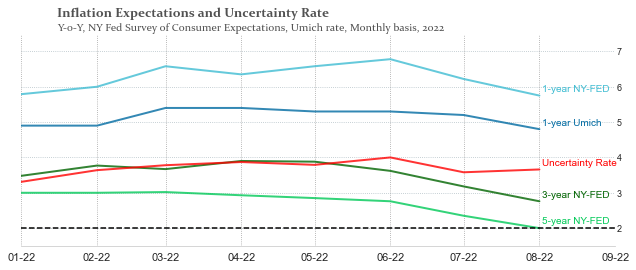

In [429]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(9,4))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.12, y=.935, s="Inflation Expectations and Uncertainty Rate ", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Y-o-Y, NY Fed Survey of Consumer Expectations, Umich rate, Monthly basis, 2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2',"#006400","#00C957", "red"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, 4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

#plt.figtext(.67, .22, "Total remains above 11 M", **hfont)


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2022-01-01"), date.fromisoformat("2022-09-01")])

plt.ylim([float(1.5), float(7.5)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")

plt.axhline(y = 2, color = "black",linestyle ='--')


ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.savefig('filename.png', dpi=300, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

In [170]:
gdp = fred.get_series('UNEMPLOY',frequency = "m", observation_start = '2015-01-01')
gdp.name = 'UNEMPLOY'

real_gdp = fred.get_series('JTSJOL', frequency = "m", observation_start = '2015-01-01')
real_gdp.name = 'JTSJOL'

gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = 'Unemployed'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Job Openings'

diff = pd.DataFrame()

diff['Percentage'] = gdp_plot.iloc[:, 0] - real_gdp_plot.iloc[:, 0]
diff['Year'] = real_gdp_plot.iloc[:, 1]
diff.reset_index(drop=True, inplace=True)
diff.dropna(inplace=True)
diff['type'] = 'Difference'

#in this case, we need to merge datasets to compare them both

all_dfs = [gdp_plot, real_gdp_plot, diff]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

In [171]:
merg

,Percentage,Year,type1
275,-4039.0,2022-08-01,Difference
208,1851.0,2017-01-01,Difference
209,1456.0,2017-02-01,Difference
210,1262.0,2017-03-01,Difference
211,998.0,2017-04-01,Difference
...,...,...,...
65,17616.0,2020-06-01,Unemployed
66,16288.0,2020-07-01,Unemployed
68,12584.0,2020-09-01,Unemployed
58,5930.0,2019-11-01,Unemployed


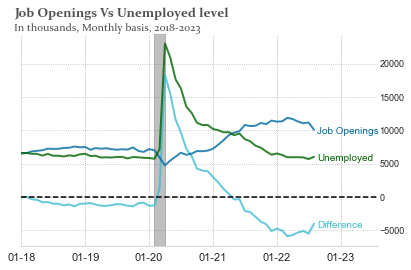

In [172]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(6,4))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.12, y=.935, s="Job Openings Vs Unemployed level", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="In thousands, Monthly basis, 2018-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2', "#006400"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

#plt.figtext(.67, .22, "Total remains above 11 M", **hfont)


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2018-01-01"), date.fromisoformat("2023-08-01")])

#plt.ylim([float(2), float(8)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")

ax.xaxis.set_major_formatter(date_form)
plt.axhline(y = 0, color = "black",linestyle ='--')

ax.set(ylabel=None)
plt.savefig('filename.png', dpi=300, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

Lets work on projections as dotted lines connections. Let's create a 

# Let's now work with bar graphs